In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
r_shift = pd.read_csv('redshifts.csv')

In [39]:
#checking number of missing values in redshift dataset
r_shift['name'][r_shift['redshift'].isna() == False]

2        4FGL_J0000.7+2530
6        4FGL_J0001.5+2113
9        4FGL_J0001.8-2153
10       4FGL_J0002.1-6728
11      4FGL_J0002.1+6721c
               ...        
2856     4FGL_J1151.6-2115
2857     4FGL_J1152.0-6107
2858     4FGL_J1152.1+2837
2859     4FGL_J1152.1-3553
2861     4FGL_J1152.6-6207
Name: name, Length: 1591, dtype: object

In [40]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
vou = pd.read_csv('drive/MyDrive/vou_100.csv')

In [42]:
vou.columns

Index(['Unnamed: 0', 'frequency', 'nufnu', 'nufnu_upper', 'nufnu_lower',
       'start_time', 'end_time', 'flag', 'Catalog', 'nufnu_err',
       'source_name'],
      dtype='object')

In [43]:
vou = vou.rename(columns={'source_name': 'name'})

In [44]:
vou = pd.merge(vou, r_shift)

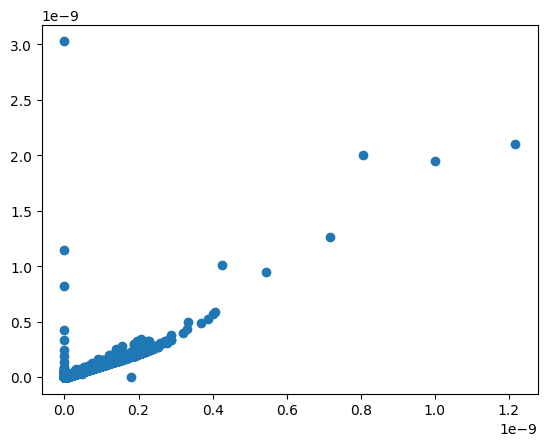

In [45]:
plt.scatter(vou['nufnu'], vou['nufnu_upper'])
plt.show()

In [46]:
#nufnu is equal to the mean of nufnu_upper and nufnu_lower
#nufnu_err equal to nufnu - nufnu_lower

In [47]:
#deleting outliers
vou = vou.drop(vou['nufnu'][vou['nufnu']>0.4*1e-9].index, axis = 0)
vou = vou.drop(vou[(vou['nufnu'] < 0.01 * 1e-9) & (vou['nufnu_upper'] > 0.2 * 1e-10)].index, axis = 0)

In [48]:
#dropping rows where nufnu upper is lower than nufnu
vou = vou.drop(vou[(vou['nufnu']) > (vou['nufnu_upper'])].index, axis=0)


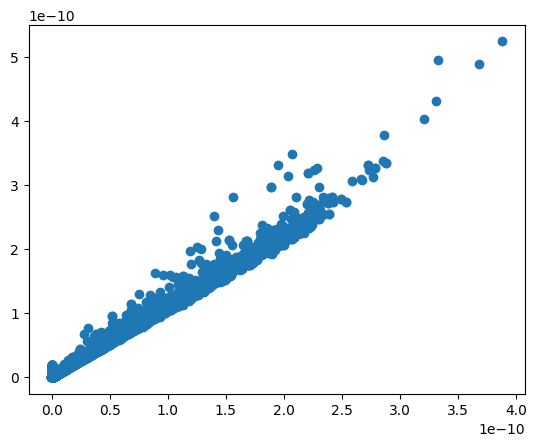

In [49]:
plt.scatter(vou['nufnu'], vou['nufnu_upper'])
plt.show()

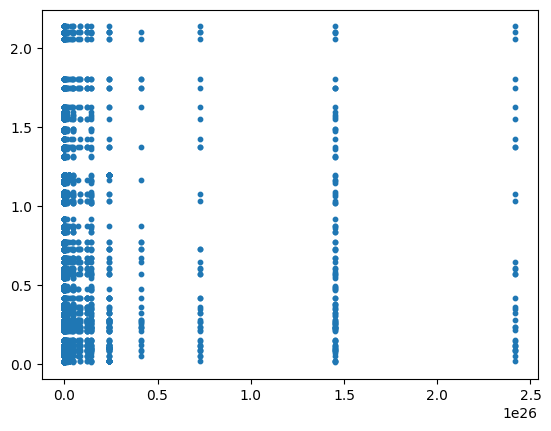

In [50]:
#frequencies have discrete values.
plt.scatter(vou['frequency'], vou['redshift'], s=10)
plt.show()

In [51]:
vou_ = vou.drop(['Unnamed: 0', 'flag', 'Catalog', 'name'], axis = 1)

In [62]:
vou_.corr()
#Given the high correlation of approximately 99.6% between
#nufnu and nufnu_upper, nufnu_lower, it seems reasonable to remove the nufnu_upper and nufnu_lower features.
vou = vou.drop(['nufnu_lower', 'nufnu_upper'], axis = 1)

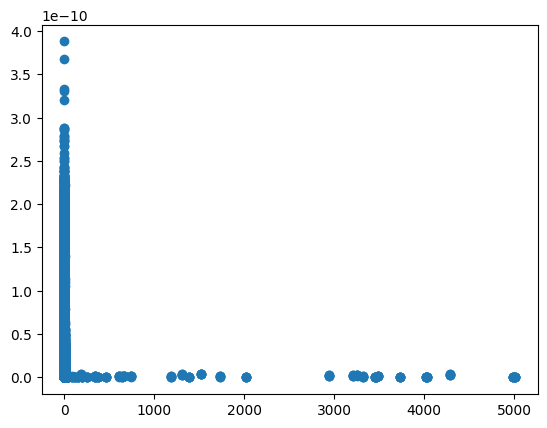

In [53]:
 plt.scatter(vou['end_time']-vou['start_time'], vou['nufnu'])
 vou = vou.drop(['start_time', 'end_time'], axis = 1)#I think there's something wrong with the start and end times here
 plt.show()

In [54]:
#OneHotEncoding
df1 = pd.get_dummies(vou[['flag', 'Catalog']], dtype = int)
vou = pd.concat([vou, df1], axis=1)

In [55]:
vou = vou.drop(['Unnamed: 0', 'flag', 'Catalog'], axis = 1)

<Axes: xlabel='redshift', ylabel='Density'>

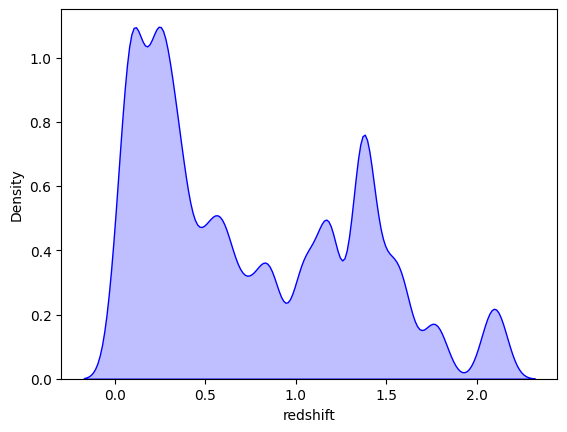

In [56]:
sns.kdeplot(vou['redshift'], fill=True, color = 'blue')

<Axes: xlabel='nufnu', ylabel='Density'>

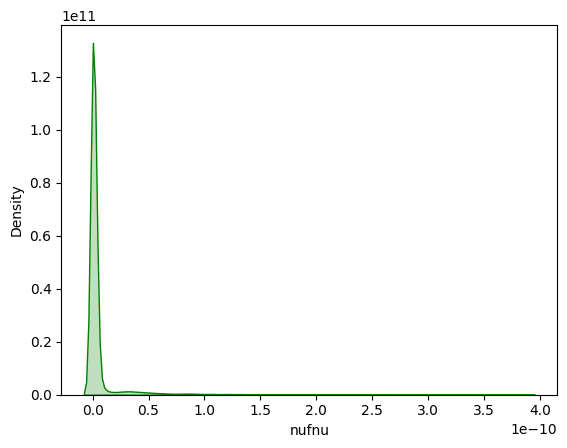

In [57]:
sns.kdeplot(vou['nufnu'], fill=True, color = 'green')

3841     2.418000e+26
16000    2.418000e+26
19893    2.418000e+26
20771    2.418000e+26
22418    2.418000e+26
             ...     
29797    2.418000e+25
29801    2.418000e+25
29805    2.418000e+25
29809    2.418000e+25
29813    2.418000e+25
Name: frequency, Length: 1000, dtype: float64

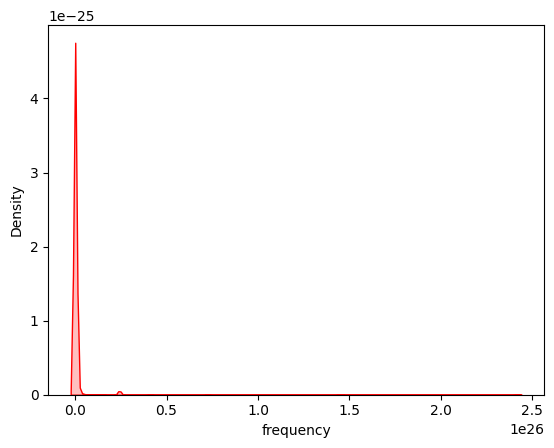

In [58]:
sns.kdeplot(vou['frequency'], fill=True, color = 'red')
vou['frequency'].nlargest(1000)#there is a lot of frequency values which has 10^25 or 10^26 degree and I dont consider them as outliers

<Axes: xlabel='nufnu_err', ylabel='Density'>

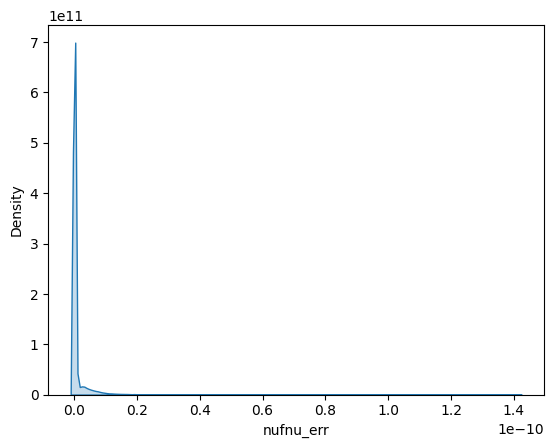

In [59]:
sns.kdeplot(vou['nufnu_err'], fill=True)